This example is from the following site by Sebastian Raschka: https://sebastianraschka.com/Articles/2014_pca_step_by_step.html

Steps to do PCA:
1. Take the whole dataset consisting of d-dimensional samples ignoring the class labels
2. Compute the d-dimensional mean vector (i.e., the means for every dimension of the whole dataset) ---> mean center the data if it is on different scales (In this example, it is not)
3. Compute the scatter matrix (alternatively, the covariance matrix) of the whole data set
4. Compute eigenvectors (ee1,ee2,...,eed) and corresponding eigenvalues (λλ1,λλ2,...,λλd)
5. Sort the eigenvectors by decreasing eigenvalues and choose k eigenvectors with the largest eigenvalues to form a d×k dimensional matrix WW(where every column represents an eigenvector)
6. Use this d×k eigenvector matrix to transform the samples onto the new subspace. This can be summarized by the mathematical equation:
yy=WWT×xx (where xx is a d×1-dimensional vector representing one sample, and yy is the transformed k×1-dimensional sample in the new subspace.)

In [2]:
#generating two samples. --- one with mean of 0 and the other with 1
import numpy as np

np.random.seed(2345678) # random seed for consistency

# A reader pointed out that Python 2.7 would raise a
# "ValueError: object of too small depth for desired array".
# This can be avoided by choosing a smaller random seed, e.g. 1
# or by completely omitting this line, since I just used the random seed for
# consistency.

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T
assert class1_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T
assert class2_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

Populating the interactive namespace from numpy and matplotlib


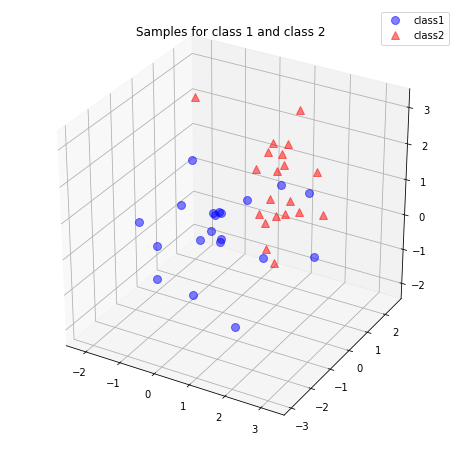

In [6]:
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:], '^', markersize=8, alpha=0.5, color='red', label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

In [7]:
#getting the whole dataset
all_samples = np.concatenate((class1_sample, class2_sample), axis=1)
assert all_samples.shape == (3,40), "The matrix has not the dimensions 3x40"

In [20]:
mean_vector = all_samples.mean(axis = 1).reshape((-1,1))
print(mean_vector)

[[0.53135985]
 [0.37515902]
 [0.54289799]]


Computing the Scatter Matrix
The scatter matrix is computed by the following equation:
S=∑(xxk−mm)(xxk−mm)T where k is from 1 to n
where mm is the mean vector


In [21]:
scatter_matrix = np.zeros((3,3))
for i in range(all_samples.shape[1]):
    scatter_matrix += (all_samples[:,i].reshape(3,1) - mean_vector).dot((all_samples[:,i].reshape(3,1) - mean_vector).T)
print('Scatter Matrix:\n', scatter_matrix)

Scatter Matrix:
 [[42.33113783  8.53965918  8.24828305]
 [ 8.53965918 62.03833998  8.48968543]
 [ 8.24828305  8.48968543 51.26740506]]


In [22]:
(all_samples - mean_vector).dot((all_samples - mean_vector).T)

array([[42.33113783,  8.53965918,  8.24828305],
       [ 8.53965918, 62.03833998,  8.48968543],
       [ 8.24828305,  8.48968543, 51.26740506]])

In [23]:
cov_mat = np.cov([all_samples[0,:],all_samples[1,:],all_samples[2,:]])
print('Covariance Matrix:\n', cov_mat)

Covariance Matrix:
 [[1.08541379 0.21896562 0.21149444]
 [0.21896562 1.59072667 0.21768424]
 [0.21149444 0.21768424 1.31454885]]


In [24]:
np.cov(all_samples)

array([[1.08541379, 0.21896562, 0.21149444],
       [0.21896562, 1.59072667, 0.21768424],
       [0.21149444, 0.21768424, 1.31454885]])

In [25]:
#calculating eigen values and vectors
# eigenvectors and eigenvalues for the scatter matrix
eig_val_sc, eig_vec_sc = np.linalg.eig(scatter_matrix)

# eigenvectors and eigenvalues for the covariance matrix
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

for i in range(len(eig_val_sc)):
    eigvec_sc = eig_vec_sc[:,i].reshape(1,3).T
    eigvec_cov = eig_vec_cov[:,i].reshape(1,3).T
    assert eigvec_sc.all() == eigvec_cov.all(), 'Eigenvectors are not identical'

    print('Eigenvector {}: \n{}'.format(i+1, eigvec_sc))
    print('Eigenvalue {} from scatter matrix: {}'.format(i+1, eig_val_sc[i]))
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
    print('Scaling factor: ', eig_val_sc[i]/eig_val_cov[i])
    print(40 * '-')

Eigenvector 1: 
[[-0.37172649]
 [-0.78986155]
 [-0.48778904]]
Eigenvalue 1 from scatter matrix: 71.3002074347302
Eigenvalue 1 from covariance matrix: 1.8282104470443656
Scaling factor:  38.999999999999964
----------------------------------------
Eigenvector 2: 
[[-0.89390466]
 [ 0.16275668]
 [ 0.4176658 ]]
Eigenvalue 2 from scatter matrix: 36.92238172367116
Eigenvalue 2 from covariance matrix: 0.9467277365043876
Scaling factor:  39.00000000000004
----------------------------------------
Eigenvector 3: 
[[ 0.25050724]
 [-0.59129434]
 [ 0.76656189]]
Eigenvalue 3 from scatter matrix: 47.41429370992104
Eigenvalue 3 from covariance matrix: 1.2157511207672063
Scaling factor:  39.0
----------------------------------------


Populating the interactive namespace from numpy and matplotlib


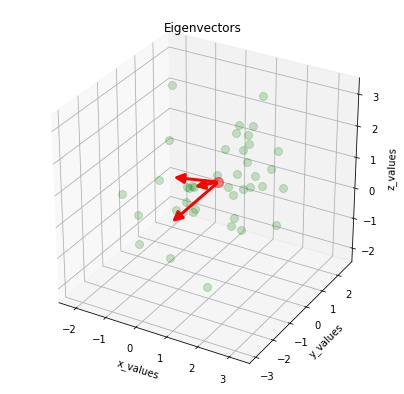

In [27]:
%pylab inline
mean_x = np.mean(all_samples[0,:])
mean_y = np.mean(all_samples[1,:])
mean_z = np.mean(all_samples[2,:])


from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(all_samples[0,:], all_samples[1,:], all_samples[2,:], 'o', markersize=8, color='green', alpha=0.2)
ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color='red', alpha=0.5)
for v in eig_vec_sc.T:
    a = Arrow3D([mean_x, v[0]], [mean_y, v[1]], [mean_z, v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

In [29]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_sc[i]), eig_vec_sc[:,i]) for i in range(len(eig_val_sc))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0])

71.3002074347302
47.41429370992104
36.92238172367116


Choosing k eigenvectors with the largest eigenvalues

For our simple example, where we are reducing a 3-dimensional feature space to a 2-dimensional feature subspace, we are combining the two eigenvectors with the highest eigenvalues to construct our d×k-dimensional eigenvector matrix WW.

In [30]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1), eig_pairs[1][1].reshape(3,1)))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.37172649  0.25050724]
 [-0.78986155 -0.59129434]
 [-0.48778904  0.76656189]]


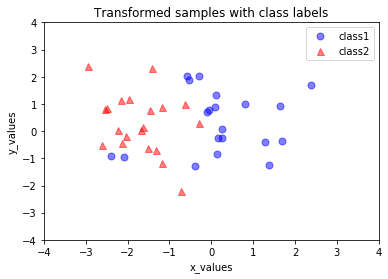

In [31]:
transformed = matrix_w.T.dot(all_samples) #transform samples to new subspace
#now plot
plt.plot(transformed[0,0:20], transformed[1,0:20], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()